0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(profile=Spherical(c=-0.030391441769997564), interact_mode=transmit)
2 Surface(profile=Spherical(c=0.019764017629503725), interact_mode=transmit)
3 Surface(profile=Spherical(c=0.008263984728156221), interact_mode=transmit)
4 Surface(profile=Spherical(c=-0.028372013845542755), interact_mode=transmit)
5 Surface(profile=Spherical(c=0.032095516256378985), interact_mode=transmit)
6 Surface(profile=Spherical(c=-0.014164707215501856), interact_mode=transmit)
7 Surface(profile=Spherical(c=0.0), interact_mode=transmit)
8 Surface(profile=Spherical(c=-0.032095516256378985), interact_mode=transmit)
9 Surface(profile=Spherical(c=0.023126199671607964), interact_mode=transmit)
10 Surface(profile=Spherical(c=0.005578893928489737), interact_mode=transmit)
11 Surface(profile=Spherical(c=-0.05367686527106817), interact_mode=transmit)
12 Surface(profile=Spherical(c=-0.05487269534679543), interact_mode=transmit)
13 Surface(prof

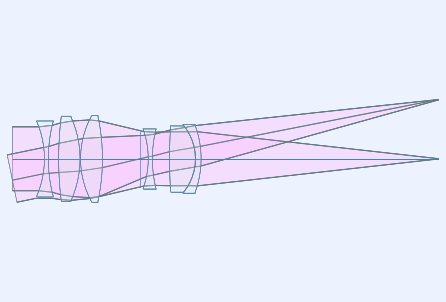

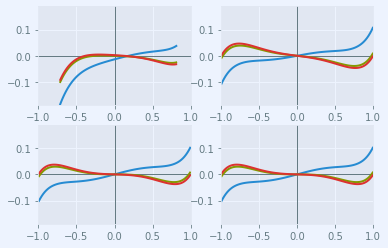

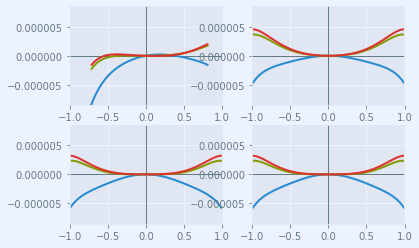

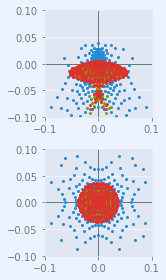

In [2]:
%matplotlib inline
isdark = False
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

# JP1994-029897 Example 4 (Nikon 105mm f/4.5 UV-Micro-Nikkor)
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

# Surface[1] = type=S radius=-32.904 thickness=1.331 diameter = 26.4 nd = 1.45851 vd = 67.93
# Surface[2] = type=S radius=50.597 thickness=3.613 diameter = 26.4 nd = 0 vd = 0
# Surface[3] = type=S radius=121.007 thickness=7.415 diameter = 29.64 nd = 1.43388 vd = 95.57
# Surface[4] = type=S radius=-35.246 thickness=0.19 diameter = 29.64 nd = 0 vd = 0
# Surface[5] = type=S radius=31.157 thickness=7.605 diameter = 30.18 nd = 1.43388 vd = 95.57
# Surface[6] = type=S radius=-70.598 thickness=13 diameter = 30.18 nd = 0 vd = 0
# Surface[7] = type=AS radius=0 thickness=2.924 diameter = 19.602 nd = 0 vd = 0
# Surface[8] = type=S radius=-31.157 thickness=1.426 diameter = 20.94 nd = 1.45851 vd = 67.93
# Surface[9] = type=S radius=43.241 thickness=5.989 diameter = 20.94 nd = 0 vd = 0
# Surface[10] = type=S radius=179.247 thickness=8.936 diameter = 23.14 nd = 1.43388 vd = 95.57
# Surface[11] = type=S radius=-18.63 thickness=0.111 diameter = 23.14 nd = 0 vd = 0
# Surface[12] = type=S radius=-18.224 thickness=1.901 diameter = 23.88 nd = 1.45851 vd = 67.93
# Surface[13] = type=S radius=-33.891 thickness=82.765 diameter = 23.88 nd = 0 vd = 0

opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=4.5)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 11.7])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = 'JP1994-029897 Example 4 (Nikon 105mm f/4.5 UV-Micro-Nikkor)'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([-32.904,1.331,1.45851,67.93])
sm.ifcs[sm.cur_surface].max_aperture = 13.2
sm.add_surface([50.597,3.613])
sm.ifcs[sm.cur_surface].max_aperture = 13.2
sm.add_surface([121.007,7.415,1.43388,95.57])
sm.ifcs[sm.cur_surface].max_aperture = 14.82
sm.add_surface([-35.246,0.19])
sm.ifcs[sm.cur_surface].max_aperture = 14.82
sm.add_surface([31.157,7.605,1.43388,95.57])
sm.ifcs[sm.cur_surface].max_aperture = 15.09
sm.add_surface([-70.598,13])
sm.ifcs[sm.cur_surface].max_aperture = 15.09
sm.add_surface([0,2.924])
sm.set_stop()
sm.ifcs[sm.cur_surface].max_aperture = 9.801
sm.add_surface([-31.157,1.426,1.45851,67.93])
sm.ifcs[sm.cur_surface].max_aperture = 10.47
sm.add_surface([43.241,5.989])
sm.ifcs[sm.cur_surface].max_aperture = 10.47
sm.add_surface([179.247,8.936,1.43388,95.57])
sm.ifcs[sm.cur_surface].max_aperture = 11.57
sm.add_surface([-18.63,0.111])
sm.ifcs[sm.cur_surface].max_aperture = 11.57
sm.add_surface([-18.224,1.901,1.45851,67.93])
sm.ifcs[sm.cur_surface].max_aperture = 11.94
sm.add_surface([-33.891,82.765])
sm.ifcs[sm.cur_surface].max_aperture = 11.94
sm.list_surfaces()
sm.list_gaps()
sm.do_apertures = False
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()